<a href="https://colab.research.google.com/github/subhajitt1999/ColabNootbook/blob/main/breastcancer_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/ML/BreastCancer.csv')

In [ ]:
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


# ***Balanced or Imbalanced Checking***





In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
len(df[df.Class==1])/df['Class'].value_counts().sum()

0.3447782546494993

In [ ]:
len(df[df.Class==0])/df['Class'].value_counts().sum()

0.6552217453505007

# ***Missing Value Checking***

In [ ]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

***Missing Value Imputation:***

In [ ]:
df['Bare.nuclei'] = df['Bare.nuclei'].fillna(np.mean(df['Bare.nuclei']))

In [ ]:
df.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

# ***Feature Reduction***

In [ ]:
df.corr()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901,-0.080226
Cl.thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
Cell.size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
Cell.shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
Marg.adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
Epith.c.size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
Bare.nuclei,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
Bl.cromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
Normal.nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170


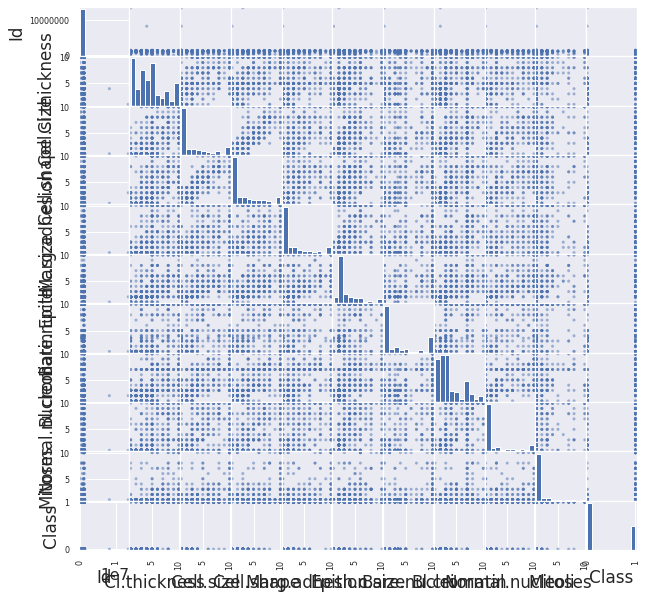

In [ ]:

# From above we can see strong +correlation between Cl.thickness,Cell.size,Cell.shape,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin & Normal.nucleoli, lets confirm by plotting

%matplotlib inline


pd.plotting.scatter_matrix(df, figsize =(10,10))
plt.show()

In [ ]:
# Drop Id & Mitoses column not used in analysis
df.drop(['Id','Mitoses'], 1, inplace=True)

In [ ]:
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Class
0,5,1,1,1,2,1.0,3,1,0
1,5,4,4,5,7,10.0,3,2,0
2,3,1,1,1,2,2.0,3,1,0
3,6,8,8,1,3,4.0,3,7,0
4,4,1,1,3,2,1.0,3,1,0


# ***Converting Class Datatype from numerical to string***

In [ ]:
# Label encoding Target variable
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

# ***Outlayer Checking***

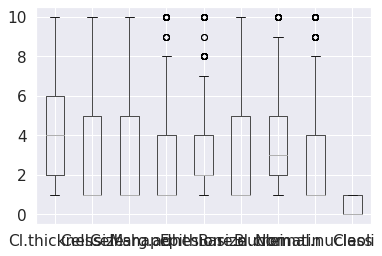

In [ ]:
df.boxplot()

**The data set contains several outlayers, So we have to apply Standradization here.**

# ***Train Test Split***

In [ ]:
X = np.array(df.drop(['Class'], axis=1))
y = np.array(df['Class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 121)

# ***Standradization***

In [ ]:
# Scale the data. We will use the same scaler later for scoring function
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ***Classification Algo: Random Forest***

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

***Score***

In [ ]:
print('Train Score:',classifier_rf.score(X_train,y_train))
print('Test Scxore:',classifier_rf.score(X_test,y_test))

Train Score: 0.998211091234347
Test Scxore: 0.9785714285714285


***Prediction***

In [ ]:
# Predicting the Test set results
y_pred = classifier_rf.predict(X_test)

# ***Result Analysis***

***Confusion Matrix***

In [ ]:
# Making the Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

[[85  2]
 [ 1 52]]


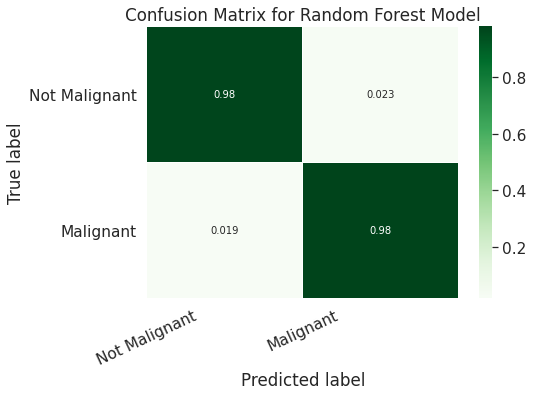

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Not Malignant','Malignant']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

***Precision***

In [ ]:
precision_score(y_test, y_pred)

0.9629629629629629

***Recall***

In [ ]:
recall_score(y_test, y_pred)

0.9811320754716981

***f1 Score***

In [ ]:
f1_score(y_test, y_pred)

0.9719626168224299

***Classification Report***

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        53

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

